In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from tqdm import tqdm
%matplotlib inline
plt.ioff()

In [2]:
D = []
for name in tqdm(glob.glob('l_3*')):
    _, n, spam, avgover, batches, batchsize, gamma, dynamics = name.split('/')[-1].split('_')
    with open(name,'r') as f:
        try:
            ds = eval(f.read())
        except NameError:
            continue
        d = pd.DataFrame(ds)
        d['epoch'] = d.index
        d['n'] = int(n)
        d['spam'] = float(spam)
        d['avgover'] = float(avgover)
        d['batches'] = int(batches)
        d['batchsize'] = int(batchsize)
        d['gamma'] = float(gamma)
        d['dynamics'] = dynamics
        D.append(d)
D = pd.concat(D,ignore_index=True)
Dlast = D.loc[D.groupby(['n', 'spam', 'avgover', 'batches', 'batchsize', 'gamma', 'dynamics'])['epoch'].idxmax()]

100%|██████████| 41/41 [00:01<00:00, 24.11it/s]


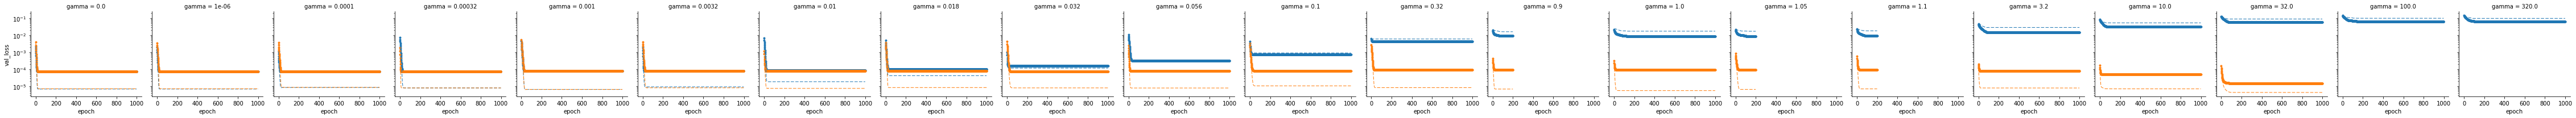

In [3]:
fg = sns.FacetGrid(D, col='gamma', hue='dynamics')
fg.map(plt.semilogy,'epoch','loss', marker='.', linewidth=0)
fg.map(plt.semilogy,'epoch','val_loss', linewidth=1, linestyle='dashed')

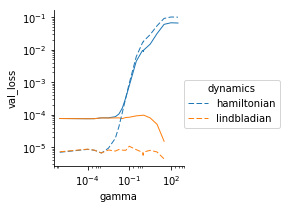

In [4]:
fg = sns.FacetGrid(Dlast, hue='dynamics')
fg.map(plt.loglog,'gamma','loss', linewidth=1)
fg.map(plt.loglog,'gamma','val_loss', linewidth=1, linestyle='dashed')
fg.add_legend()

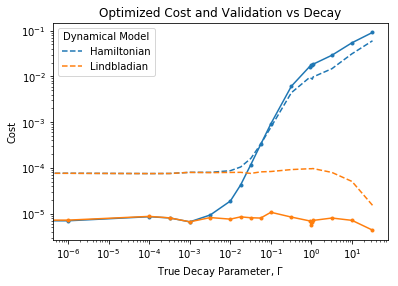

In [3]:
plt.figure()
Dlast_ = Dlast[Dlast.gamma<32.1]
plt.loglog(Dlast_[Dlast_.dynamics=='hamiltonian'].gamma, Dlast_[Dlast_.dynamics=='hamiltonian'].loss, '--')
plt.loglog(Dlast_[Dlast_.dynamics=='lindbladian'].gamma, Dlast_[Dlast_.dynamics=='lindbladian'].loss, '--')
plt.loglog(Dlast_[Dlast_.dynamics=='hamiltonian'].gamma, Dlast_[Dlast_.dynamics=='hamiltonian'].val_loss, '.-', color='C0', zorder=-10)
plt.loglog(Dlast_[Dlast_.dynamics=='lindbladian'].gamma, Dlast_[Dlast_.dynamics=='lindbladian'].val_loss, '.-', color='C1', zorder=-10)
plt.legend(['Hamiltonian','Lindbladian'],title='Dynamical Model')
plt.title('Optimized Cost and Validation vs Decay')
plt.xlabel('True Decay Parameter, $\Gamma$')
plt.ylabel('Cost')
plt.savefig('lindbladian_cost.png', dpi=400)

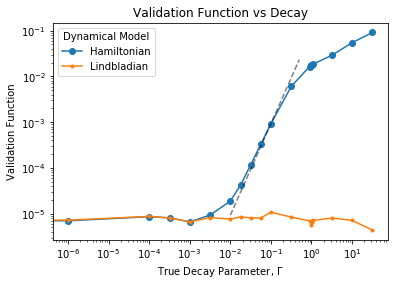

In [4]:
plt.figure()
Dlast_ = Dlast[Dlast.gamma<32.1]
plt.loglog(Dlast_[Dlast_.dynamics=='hamiltonian'].gamma, Dlast_[Dlast_.dynamics=='hamiltonian'].val_loss, 'o-')
plt.loglog(Dlast_[Dlast_.dynamics=='lindbladian'].gamma, Dlast_[Dlast_.dynamics=='lindbladian'].val_loss, '.-')
plt.legend(['Hamiltonian','Lindbladian'],title='Dynamical Model')
l = np.array([0.01,0.5])
v = float(Dlast[(Dlast.dynamics=='hamiltonian') & (Dlast.gamma==1e-1)].val_loss)
plt.loglog(l,v*(l/1e-1)**2,'k--',alpha=0.5,zorder=10)
plt.title('Validation Function vs Decay')
plt.xlabel('True Decay Parameter, $\Gamma$')
plt.ylabel('Validation Function')
plt.savefig('lindbladian.png', dpi=400)